In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [15]:
df = pd.read_csv(r"/content/location_aware_gis_leakage_dataset.csv")

print("Dataset loaded successfully!")
print(df.head())
print(df.info())


Dataset loaded successfully!
    Pressure  Flow_Rate  Temperature  Vibration          RPM  \
0  64.967142  73.643605    96.607526   2.928288  2104.485874   
1  58.617357  73.198788    98.472503   2.983672  2084.997078   
2  66.476885  53.065352    97.013095   3.032147  1719.044046   
3  75.230299  75.048647   100.552090   3.473431  2173.875267   
4  57.658466  90.992436   105.985893   2.626391  1552.975197   

   Operational_Hours    Zone    Block    Pipe          Location_Code  \
0               3380  Zone_4  Block_2  Pipe_3  Zone_4_Block_2_Pipe_3   
1               2235  Zone_3  Block_4  Pipe_1  Zone_3_Block_4_Pipe_1   
2               8762  Zone_2  Block_2  Pipe_5  Zone_2_Block_2_Pipe_5   
3               8931  Zone_5  Block_3  Pipe_2  Zone_5_Block_3_Pipe_2   
4               3403  Zone_3  Block_1  Pipe_1  Zone_3_Block_1_Pipe_1   

    Latitude  Longitude  Leakage_Flag  
0  25.162560  55.238018             0  
1  25.090473  55.162476             0  
2  25.279196  55.287601          

In [23]:
df.to_csv("cleaned_dataset.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_dataset.csv")


✅ Cleaned dataset saved as cleaned_dataset.csv


In [16]:
print("\nMissing Values:")
print(df.isnull().sum())

df = df.dropna()

numeric_cols = df.select_dtypes(include=['float64','int64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



Missing Values:
Pressure             0
Flow_Rate            0
Temperature          0
Vibration            0
RPM                  0
Operational_Hours    0
Zone                 0
Block                0
Pipe                 0
Location_Code        0
Latitude             0
Longitude            0
Leakage_Flag         0
dtype: int64


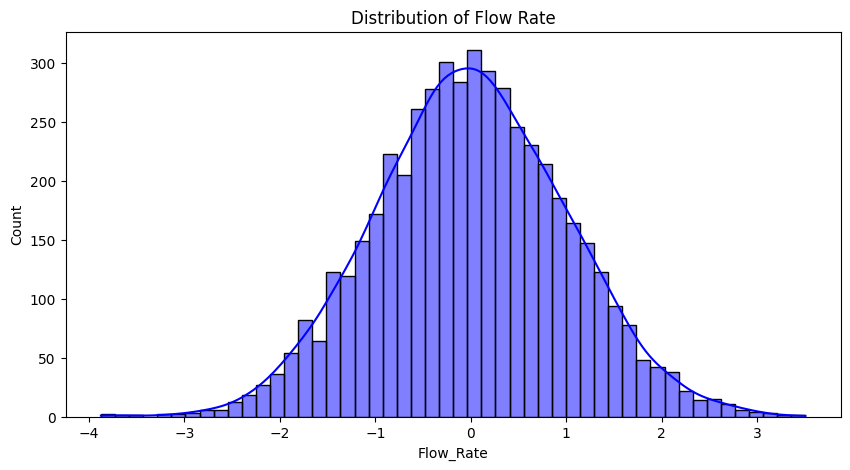

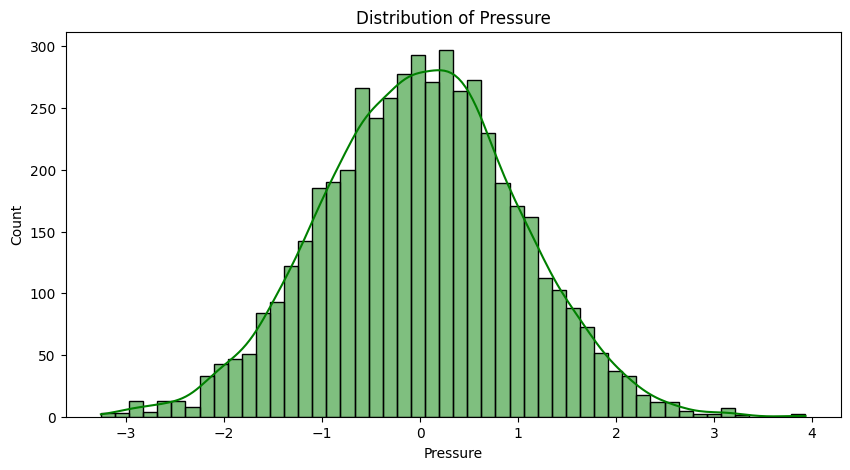

In [17]:
flow_col = 'Flow_Rate'
pressure_col = 'Pressure'

plt.figure(figsize=(10,5))
sns.histplot(df[flow_col], bins=50, kde=True, color='blue')
plt.title("Distribution of Flow Rate")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df[pressure_col], bins=50, kde=True, color='green')
plt.title("Distribution of Pressure")
plt.show()


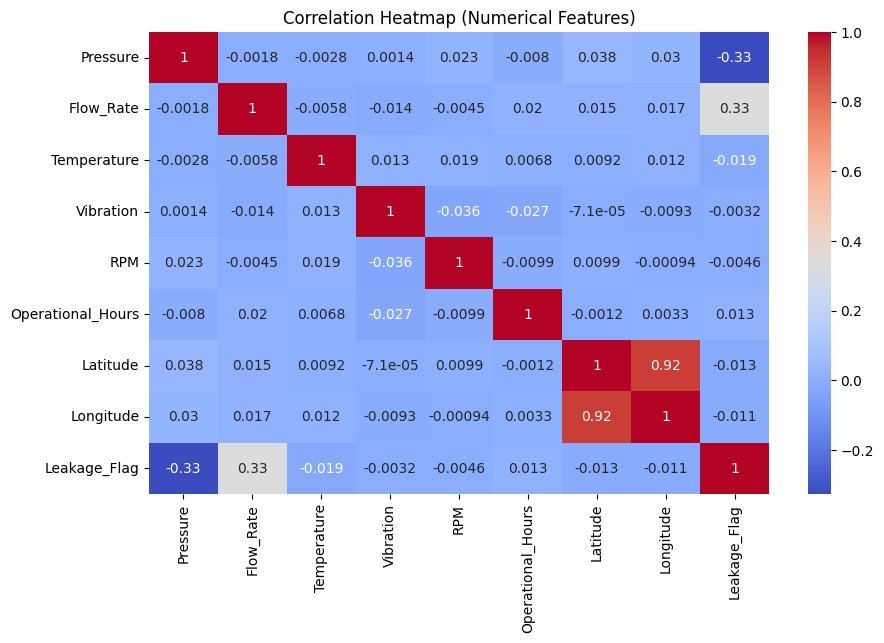

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


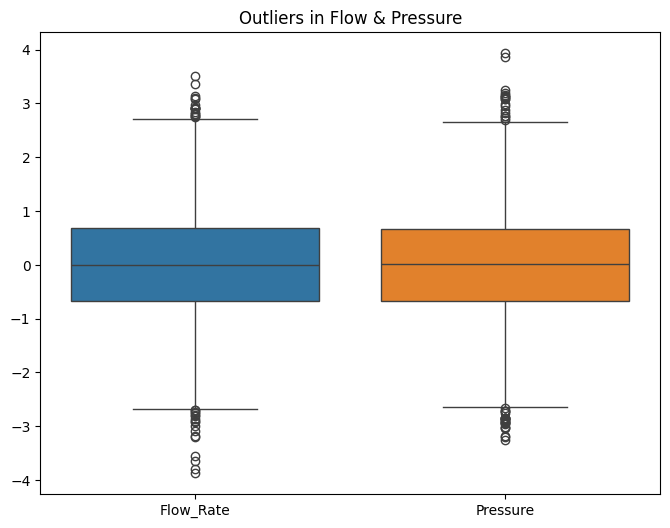

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[[flow_col, pressure_col]])
plt.title("Outliers in Flow & Pressure")
plt.show()


In [20]:
print("Statistical Insights")
for col in [flow_col, pressure_col]:
    print(f"\nFeature: {col}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Std Dev: {df[col].std():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")


Statistical Insights

Feature: Flow_Rate
Mean: 0.00
Std Dev: 1.00
Min: -3.87
Max: 3.50

Feature: Pressure
Mean: 0.00
Std Dev: 1.00
Min: -3.26
Max: 3.93


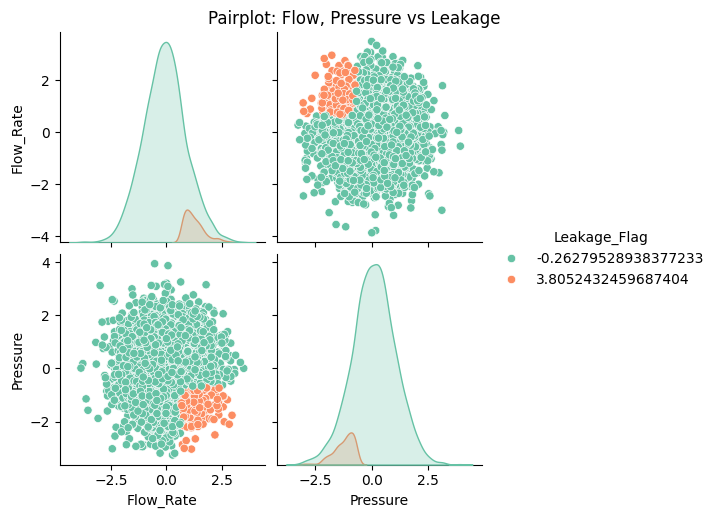

In [21]:
sns.pairplot(df[[flow_col, pressure_col, 'Leakage_Flag']], hue='Leakage_Flag', palette="Set2", diag_kind="kde")
plt.suptitle("Pairplot: Flow, Pressure vs Leakage", y=1.02)
plt.show()


In [22]:
print("\nAverage Values by Leakage Flag (0=Normal, 1=Leak):\n")
print(df.groupby('Leakage_Flag')[[flow_col, pressure_col]].mean())

print("\nWeek 1 Completed - Data is clean, analyzed & ready for Feature Engineering (Week 2)")



Average Values by Leakage Flag (0=Normal, 1=Leak):

              Flow_Rate  Pressure
Leakage_Flag                     
-0.262795     -0.086483  0.085806
 3.805243      1.252258 -1.242461

Week 1 Completed - Data is clean, analyzed & ready for Feature Engineering (Week 2)
